In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns 

from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

#Load data


In [3]:
train_data_path = r"C:\Users\Pratik Kale\Desktop\Omkar\coep\sem 6\DSci Project\House_Price_Pridiction\dataset\train.csv"
test_data_path = r"C:\Users\Pratik Kale\Desktop\Omkar\coep\sem 6\DSci Project\House_Price_Pridiction\dataset\test.csv"

train_dataframe = pd.read_csv(train_data_path)
test_dataframe = pd.read_csv(test_data_path)

print("Training data shape : ",train_dataframe.shape)
print("Testing dataframe shape : " ,test_dataframe.shape)

Training data shape :  (1460, 81)
Testing dataframe shape :  (1459, 80)


In [4]:
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

train_dataframe.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
dataframe = pd.concat([train_dataframe,test_dataframe])
dataframe.shape

(2919, 81)

In [7]:
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

most null features from dataset
Alley
FireplaceQu
PoolQC
Fence
MiscFeature 

In [9]:
int_features = dataframe.select_dtypes(include=["int64"]).columns
print("Total number of integer features : ", int_features.shape)

print("Features :" , int_features)

Total number of integer features :  (26,)
Features : Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [10]:
float_features = dataframe.select_dtypes(include=["float64"]).columns
print("Total number of integer features : ", float_features.shape)

print("Features :" , float_features)

Total number of integer features :  (12,)
Features : Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


In [11]:
object_features = dataframe.select_dtypes(include=["object"]).columns
print("Total number of object features : ", object_features.shape)

print("Features :" , object_features)

Total number of object features :  (43,)
Features : Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [12]:
dataframe.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


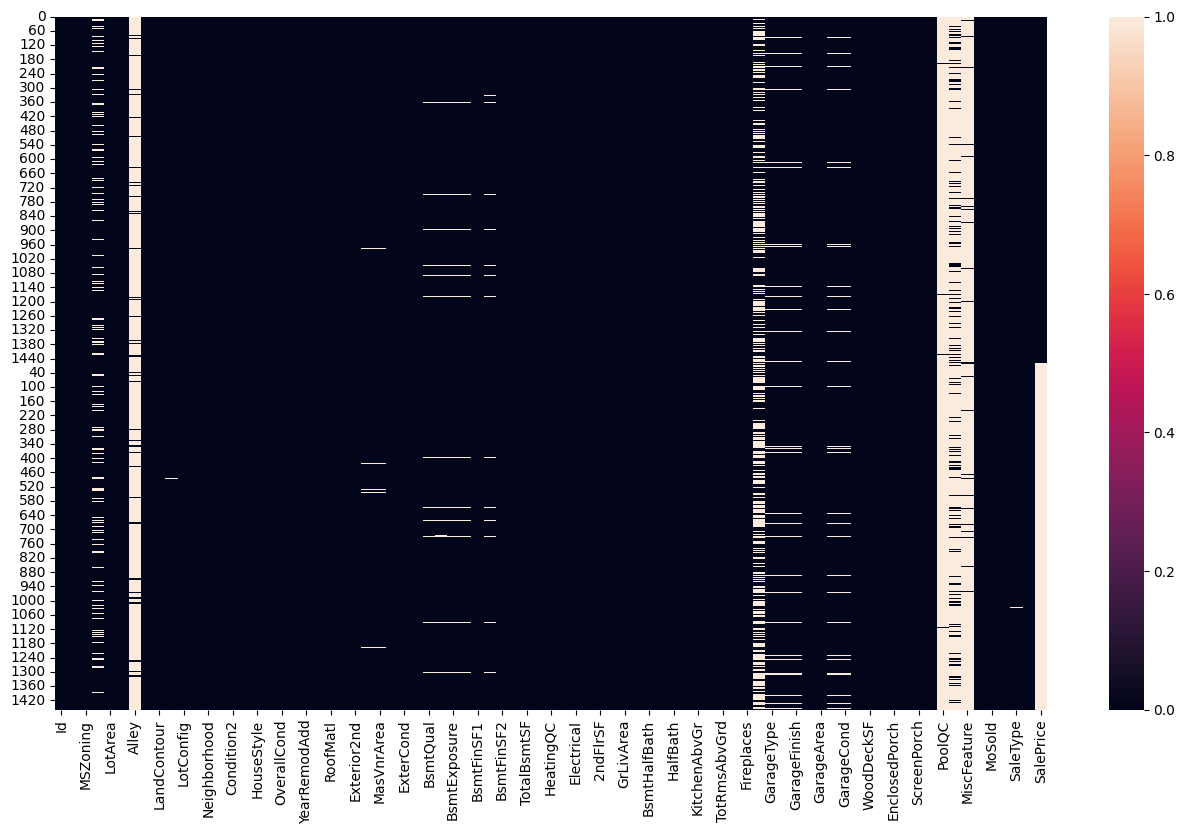

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(dataframe.isnull())
plt.savefig("EDA_img/heatmap_dataframe_of_null_values.png")

je white madhe ahe mhanje tyachya values null ahet 

In [14]:
dataframe = dataframe.set_index("Id")

In [15]:
null_count = dataframe.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

kiti percent data null ahe pratek column madhe 


In [16]:
null_percentage = dataframe.isnull().sum()/dataframe.shape[0] * 100
null_percentage

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

Removing columns or features

In [17]:
null_column_greaterthan50 = null_percentage[null_percentage > 50]
null_column_greaterthan50 
# apan he features nahi remove karu shakat karan te imp ahet tar apan none chya jagi NA replace karu 

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [18]:
null_column_5_to_50 = null_percentage[(null_percentage < 50) & (null_percentage >=5)]
null_column_5_to_50 
# Lotfrontage ani FireplaceQu pan nahi kadu shakat same seen as above 
# garage wala apan nahi kadu shakat karan null mhanje tyat garage nahiye tar aapan kadhu nahi shakat te 
# saleprice pan nahi kadu shakat apan apluyala tech pridict karaycha ahe 


LotFrontage     16.649538
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
SalePrice       49.982871
dtype: float64

<Axes: ylabel='Id'>

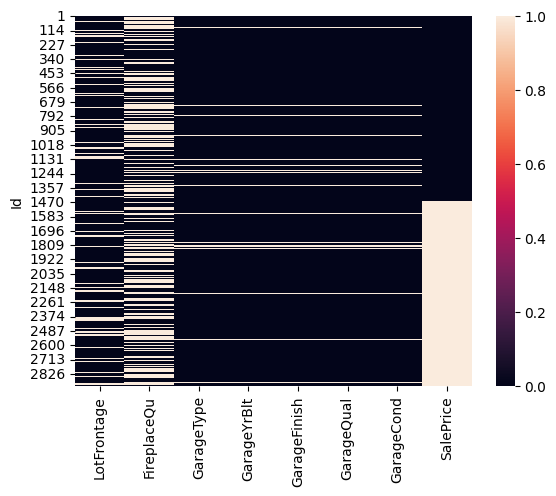

In [19]:
sns.heatmap(dataframe[null_column_5_to_50.keys()].isnull())

#Missing value imputation 

In [20]:
missing_value_feature = null_percentage[null_percentage > 0]
print("total number of missing value feature : " ,len(missing_value_feature))
missing_value_feature

total number of missing value feature :  35


MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

kiti missing features aahet datatype nusar 

In [21]:
int_missing_feature = missing_value_feature[missing_value_feature.keys().isin(int_features)]
print("total number of int missing features : " , int_missing_feature.shape)
int_missing_feature


total number of int missing features :  (0,)


Series([], dtype: float64)

In [22]:
float_missing_feature = missing_value_feature[missing_value_feature.keys().isin(float_features)]
print("total number of int missing features : " , float_missing_feature.shape)
float_missing_feature


total number of int missing features :  (12,)


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [23]:
object_missing_feature = missing_value_feature[missing_value_feature.keys().isin(object_features)]
print("total number of object missing features : " , object_missing_feature.shape)
object_missing_feature


total number of object missing features :  (23,)


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

# ata apan one by one sagle features observe karun tyachi cleaning kiva value fillup karnar 

we will see object features :
MSZoning

In [24]:
def change_null_to_mode(df, feature, mode):
    df[feature].fillna(mode, inplace=True)

In [25]:
def change_null_to_const(df , feature , const):
    df[feature].replace(np.nan, const, inplace=True)
    
def value_to_its_const_mode(df , feature , k):
    df[feature].replace(69.30579531442663 , k , inplace=True)

In [26]:
dataframe["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

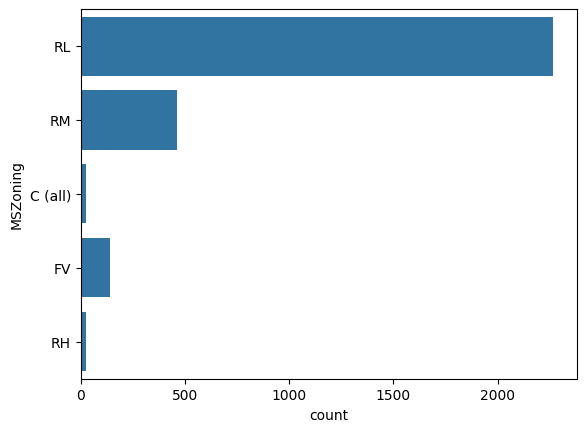

In [27]:
sns.countplot(dataframe["MSZoning"])

apan asa observe kela ki RL khup thikani ahe tr apan to replace karu mhanje Mode taku none chya jaagi }

#kahipan replace karaychya aadhi original data set chi copy banvun thevne nahitr lost hou shakto data 

In [28]:
#original chi copy tayar keli 
df_copy = dataframe.copy()

In [29]:
mszoning_mode = dataframe["MSZoning"].mode()[0]
mszoning_mode
df_copy["MSZoning"].replace(np.nan , mszoning_mode , inplace=True)


In [30]:
df_copy["MSZoning"].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

#eek function je before implace ani after implace plot karun dakhvel 



In [31]:
def old_new_count_plot(original_df, modified_df, column_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Old data distribution
    original_df[column_name].value_counts().plot(kind='bar', ax=ax1)
    ax1.set_title('Old data distribution')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Count')
    
    # New data distribution
    modified_df[column_name].value_counts().plot(kind='bar', ax=ax2)
    ax2.set_title('New data distribution')
    ax2.set_xlabel(column_name)
    ax2.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

for MSzoning

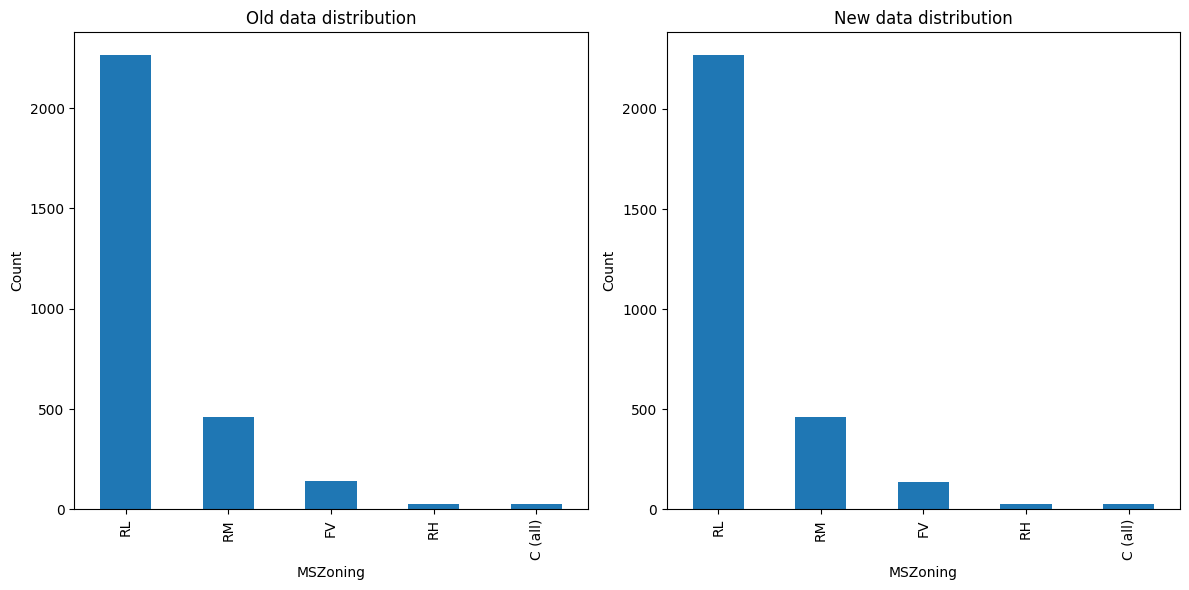

In [32]:
old_new_count_plot(dataframe , df_copy , "MSZoning")

#Now Handling Alley


In [33]:
dataframe["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [34]:
#according to dataset_description none in Alley meaning NA
# then replace none with NA
alley_constant = "NA"
df_copy["Alley"].replace( np.nan , alley_constant , inplace=True)
df_copy["Alley"].value_counts()


NA      2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

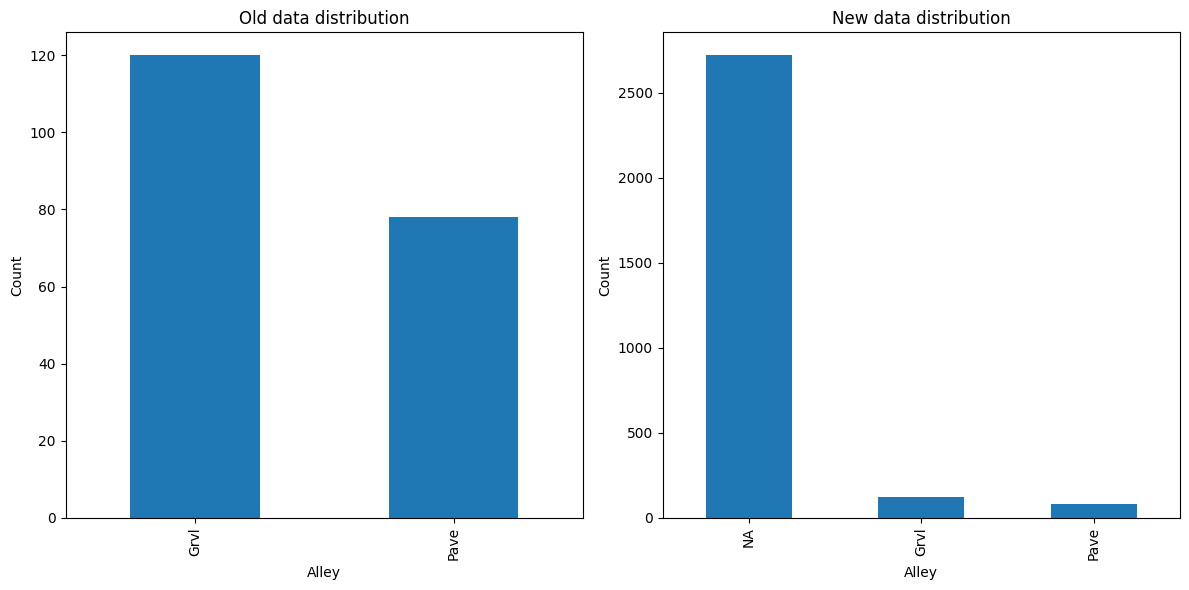

In [35]:
old_new_count_plot(dataframe , df_copy , "Alley")

In [36]:
#for plotting feature
def boxdisplot(df , figuresize=(16,5)):
    plt.figure(figsize=figuresize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)
    

###handling LotFrontage  =   16.649538

C:\Users\Pratik Kale\AppData\Local\Temp\ipykernel_15656\1981236293.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


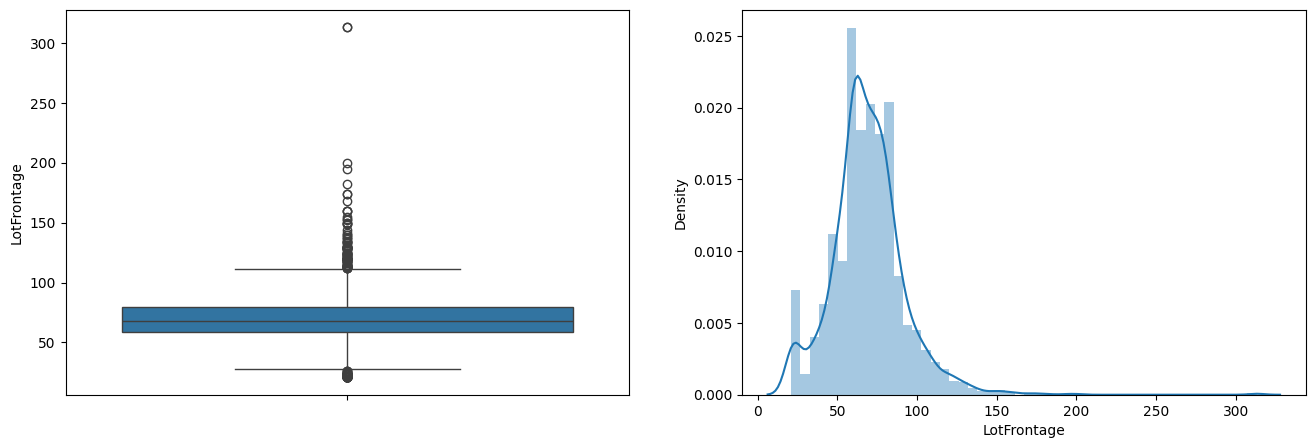

In [37]:
boxdisplot(df_copy["LotFrontage"])

from above figure we cconclude that data is right skewed or skewed to any one direction in such case we use mean value 

In [38]:
lotfrontage_mean = dataframe["LotFrontage"].mean()

df_copy["LotFrontage"].fillna(lotfrontage_mean, inplace=True)

# Check how many NaN values are left in the 'LotFrontage' column
remaining_nulls = df_copy["LotFrontage"].isnull().sum()

In [39]:
def old_new_Box_hist_plot(df_old , df_new , feature , figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df_old[feature])
    plt.title("Old Distribution")
    plt.subplot(222)
    sns.distplot(df_old[feature])
    plt.title("Old Distribution")
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("New Distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title("New Distribution")
    

C:\Users\Pratik Kale\AppData\Local\Temp\ipykernel_15656\2140059557.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_old[feature])
C:\Users\Pratik Kale\AppData\Local\Temp\ipykernel_15656\2140059557.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


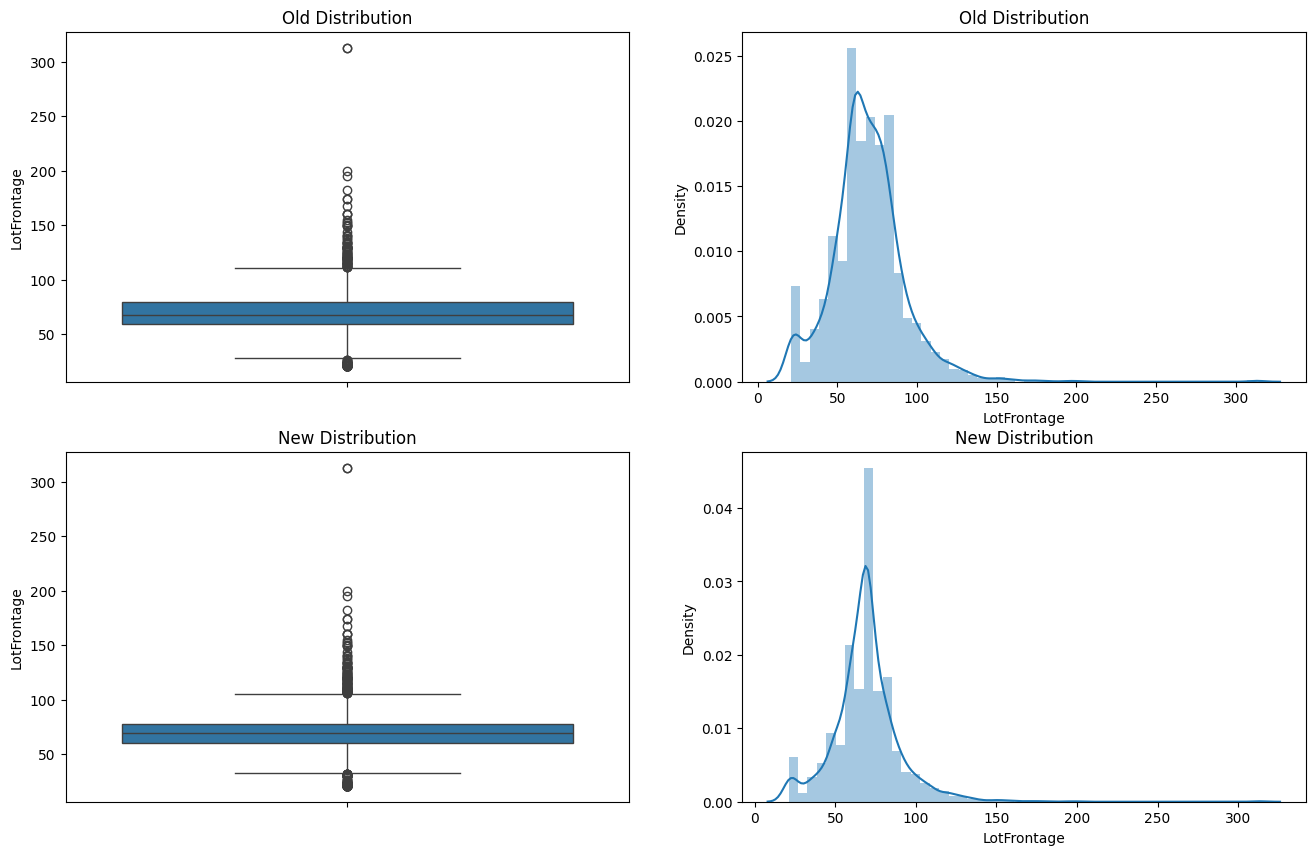

In [40]:
old_new_Box_hist_plot(dataframe , df_copy , "LotFrontage")

Handling Utilities     =   0.068517   , missing value 

In [41]:
dataframe["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [42]:
utility_mode = dataframe["Utilities"].mode()[0]
df_copy["Utilities"].replace(np.nan , utility_mode , inplace=True)
value_to_its_const_mode(df_copy,"Utilities" , utility_mode)
# df_copy["Utilities"].isnull().sum()
df_copy["Utilities"].value_counts()



AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

Handling :
 
Exterior1st      0.034258

Exterior2nd      0.034258

In [43]:
dataframe["Exterior1st"].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [44]:
dataframe["Exterior2nd"].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

apan donhi madhe mode value taknar ahot data varun ani object ahe te 


In [45]:
exterior1st_mode = dataframe["Exterior1st"].mode().iloc[0]  # .iloc[0] instead of [0]
exterior2nd_mode = dataframe["Exterior2nd"].mode().iloc[0]

df_copy["Exterior1st"].fillna(exterior1st_mode, inplace=True)
df_copy["Exterior2nd"].fillna(exterior2nd_mode, inplace=True)

print("ext 1 null values : ", df_copy["Exterior1st"].isnull().sum())
print("ext 2 null values : ", df_copy["Exterior2nd"].isnull().sum())


ext 1 null values :  0
ext 2 null values :  0


Handling missing value of :  MasVnrType      60.500171


In [46]:
dataframe["MasVnrType"].value_counts()


None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [47]:
masvnrtype_mode = dataframe["MasVnrType"].mode()[0]
df_copy["MasVnrType"].replace(69.30579531442663 ,masvnrtype_mode , inplace=True)
df_copy["MasVnrType"].value_counts()



None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

handling : # MasVnrArea
this is float value 

In [48]:
dataframe["MasVnrArea"].isnull().sum()


23

C:\Users\Pratik Kale\AppData\Local\Temp\ipykernel_15656\2140059557.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_old[feature])
C:\Users\Pratik Kale\AppData\Local\Temp\ipykernel_15656\2140059557.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


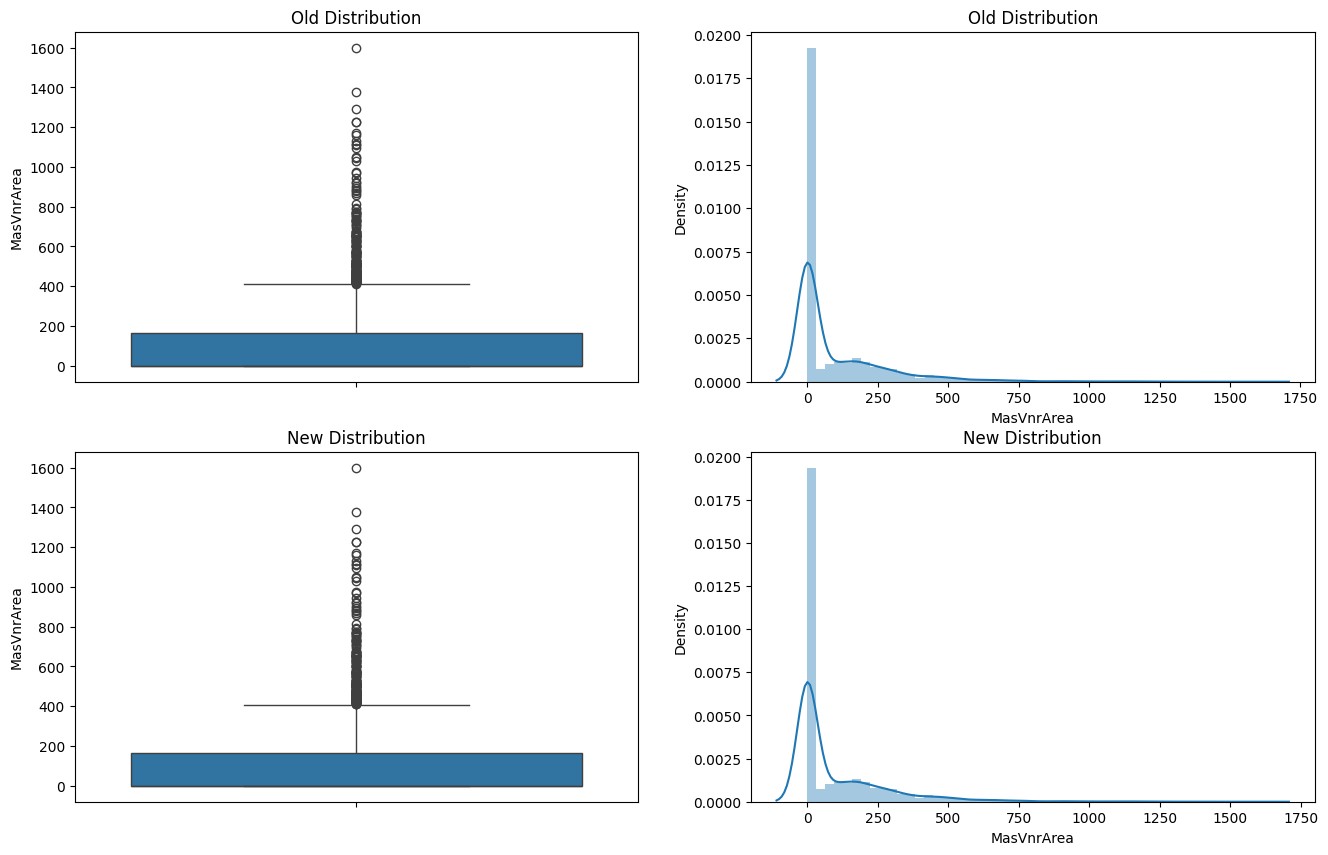

In [49]:
masvnrarea_const = 0
df_copy["MasVnrArea"].replace(np.nan ,masvnrarea_const , inplace=True)
df_copy["MasVnrArea"].isnull().sum()
old_new_Box_hist_plot(dataframe,df_copy,"MasVnrArea")


Missing value handaling of 
:
objects :

BsmtQual         2.774923

BsmtCond         2.809181

BsmtExposure     2.809181

BsmtFinType1     2.706406

BsmtFinType2     2.740665

float features :
BsmtFinSF1       0.034258

BsmtFinSF2       0.034258

BsmtUnfSF        0.034258

TotalBsmtSF      0.034258

BsmtFullBath     0.068517

BsmtHalfBath     0.068517



In [50]:
object_basmt_feature = [ "BsmtQual" ,"BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

float_basmt_feature=["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]


<Axes: ylabel='Id'>

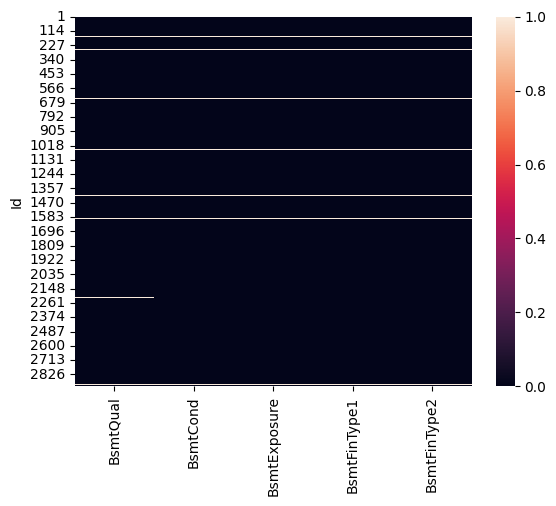

In [51]:
sns.heatmap(dataframe[object_basmt_feature].isnull())

In [52]:
for feat in object_basmt_feature:
    print(f"Value count of : {feat} : {dataframe[feat].value_counts()}")
    print(f"Missing value count of : {feat} : {dataframe[feat].isnull().sum()}")

Value count of : BsmtQual : TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Missing value count of : BsmtQual : 81
Value count of : BsmtCond : TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Missing value count of : BsmtCond : 82
Value count of : BsmtExposure : No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Missing value count of : BsmtExposure : 82
Value count of : BsmtFinType1 : Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Missing value count of : BsmtFinType1 : 79
Value count of : BsmtFinType2 : Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
Missing value count of : BsmtFinType2 : 80


In [53]:
bsmt_constant = "NA"
for feat in object_basmt_feature:
    df_copy[feat].replace(np.nan , bsmt_constant , inplace=True)
    print(f"Missing value count of : {feat} : {df_copy[feat].isnull().sum()}")

Missing value count of : BsmtQual : 0
Missing value count of : BsmtCond : 0
Missing value count of : BsmtExposure : 0
Missing value count of : BsmtFinType1 : 0
Missing value count of : BsmtFinType2 : 0


<Axes: ylabel='Id'>

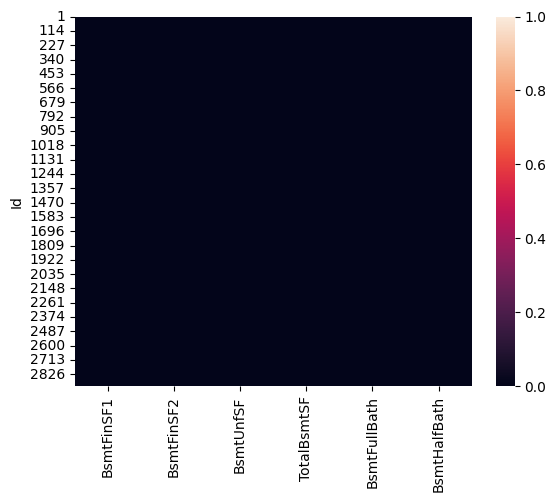

In [54]:
sns.heatmap(dataframe[float_basmt_feature].isnull())

In [55]:
bsmt_float_const = 0
for feat in float_basmt_feature:
    df_copy[feat].replace(np.nan , bsmt_float_const , inplace=True)
    print(f"Missing value count of : {feat} : {df_copy[feat].isnull().sum()}")

Missing value count of : BsmtFinSF1 : 0
Missing value count of : BsmtFinSF2 : 0
Missing value count of : BsmtUnfSF : 0
Missing value count of : TotalBsmtSF : 0
Missing value count of : BsmtFullBath : 0
Missing value count of : BsmtHalfBath : 0


handling :
Electrical       0.034258
KitchenQual      0.034258

In [56]:
#replacing with mode 
electrical_mode = dataframe["Electrical"].mode()[0]
print(electrical_mode)
df_copy["Electrical"].replace(np.nan ,electrical_mode , inplace=True)
value_to_its_const_mode(df_copy,"Electrical" , electrical_mode)
df_copy["Electrical"].value_counts()



SBrkr


SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [57]:
#replacing with mode 
keychain_mode = dataframe["KitchenQual"].mode().iloc[0]
df_copy["KitchenQual"] = df_copy["KitchenQual"].replace(np.nan , keychain_mode)
value_to_its_const_mode(df_copy,"KitchenQual" , keychain_mode)
df_copy["KitchenQual"].value_counts()



TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [58]:
"""Remaining objects : 
Functional   =    0.068517      Mode
FireplaceQu   =  48.646797      NA
PoolQC      =    99.657417      NA
Fence        =   80.438506      NA
MiscFeature   =  96.402878      NA
SaleType       =  0.034258      Mode
"""

'Remaining objects : \nFunctional   =    0.068517      Mode\nFireplaceQu   =  48.646797      NA\nPoolQC      =    99.657417      NA\nFence        =   80.438506      NA\nMiscFeature   =  96.402878      NA\nSaleType       =  0.034258      Mode\n'

In [59]:
functional_mode = dataframe["Functional"].mode()[0]
print(f"Mode value for Functional: {functional_mode}") 
change_null_to_mode(df_copy, "Functional", functional_mode)
value_to_its_const_mode(df_copy,  "Functional" , functional_mode)
print(df_copy["Functional"].value_counts())


Mode value for Functional: Typ
Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64


In [60]:
features_to_replace_with_na = ["FireplaceQu", "PoolQC", "Fence", "MiscFeature"]

for feature in features_to_replace_with_na:
    change_null_to_const(df_copy, feature, "NA")
    value_to_its_const_mode(df_copy, feature ,"NA")
    print(f"Value counts for {feature} after replacing nulls with 'NA':")
    print(df_copy[feature].value_counts())

Value counts for FireplaceQu after replacing nulls with 'NA':
NA    1420
Gd     744
TA     592
Fa      74
Po      46
Ex      43
Name: FireplaceQu, dtype: int64
Value counts for PoolQC after replacing nulls with 'NA':
NA    2909
Ex       4
Gd       4
Fa       2
Name: PoolQC, dtype: int64
Value counts for Fence after replacing nulls with 'NA':
NA       2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64
Value counts for MiscFeature after replacing nulls with 'NA':
NA      2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64


In [61]:
SaleType_mode = dataframe["SaleType"].mode()[0]
print(f"Mode value for SaleType: {SaleType_mode}") 
change_null_to_mode(df_copy, "SaleType", SaleType_mode)
value_to_its_const_mode(df_copy, "SaleType",SaleType_mode)
print(df_copy["SaleType"].value_counts())



Mode value for SaleType: WD
WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64


In [62]:
# handling this features  - object

"""
GarageType       5.378554   - NA
GarageFinish     5.447071   - NA
GarageQual       5.447071   - NA
GarageCond       5.447071   - NA
"""

'\nGarageType       5.378554   - NA\nGarageFinish     5.447071   - NA\nGarageQual       5.447071   - NA\nGarageCond       5.447071   - NA\n'

In [63]:
garage_features = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]

for feature in garage_features:
    change_null_to_const(df_copy, feature, "NA")
    value_to_its_const_mode(df_copy, feature ,"NA")
    print(f"Value counts for {feature} after replacing nulls with 'NA':")
    print(df_copy[feature].value_counts())
    print( f"Number of null in {feature} : ",df_copy[feature].isnull().sum())

Value counts for GarageType after replacing nulls with 'NA':
Attchd     1723
Detchd      779
BuiltIn     186
NA          157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64
Number of null in GarageType :  0
Value counts for GarageFinish after replacing nulls with 'NA':
Unf    1230
RFn     811
Fin     719
NA      159
Name: GarageFinish, dtype: int64
Number of null in GarageFinish :  0
Value counts for GarageQual after replacing nulls with 'NA':
TA    2604
NA     159
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64
Number of null in GarageQual :  0
Value counts for GarageCond after replacing nulls with 'NA':
TA    2654
NA     159
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64
Number of null in GarageCond :  0


In [64]:
# handling float values

"""
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
"""

'\nGarageYrBlt      5.447071\nGarageCars       0.034258\nGarageArea       0.034258\n'

In [65]:
float_features = ["GarageYrBlt", "GarageCars", "GarageArea"]


for feature in float_features:
    change_null_to_const(df_copy, feature, 0)
    print(f"Value counts for {feature} after replacing nulls with 0:")
    print(df_copy[feature].isnull().sum())

Value counts for GarageYrBlt after replacing nulls with 0:
0
Value counts for GarageCars after replacing nulls with 0:
0
Value counts for GarageArea after replacing nulls with 0:
0


In [66]:
# MasVnrType       0.822199
MasVnrType_mode = dataframe["MasVnrType"].mode()[0]
print(f"Mode value for MasVnrType: {MasVnrType_mode}") 
change_null_to_mode(df_copy, "MasVnrType", MasVnrType_mode)
value_to_its_const_mode(df_copy,  "MasVnrType" , MasVnrType_mode)
print(df_copy["MasVnrType"].value_counts())

Mode value for MasVnrType: None
None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64


In [67]:
df_copy.isnull().any(axis=1).sum()

1459

##Feature Transformation
###converting numerical feature into categorical feature

In [68]:
feature_for_converting_num_to_object = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
# he mahiti zhala data description cha observation kelyamule 
df_copy[feature_for_converting_num_to_object].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [69]:
df_copy["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [70]:
import calendar
calendar.month_abbr[2]

'Feb'

In [71]:
df_copy["MoSold"] = df_copy["MoSold"].apply(lambda x :calendar.month_abbr[x])


In [72]:
df_copy["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [73]:
for feature in feature_for_converting_num_to_object:
    df_copy[feature] = df_copy[feature].astype(str)

In [74]:
for feature in feature_for_converting_num_to_object:
    print(f"data type of {feature} : ", df_copy[feature].dtype)

data type of MSSubClass :  object
data type of YearBuilt :  object
data type of YearRemodAdd :  object
data type of GarageYrBlt :  object
data type of MoSold :  object
data type of YrSold :  object


## Converting categorical features into numerical Feature 


In [75]:
ordinal_end_var=["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC","Functional","GarageFinish","PavedDrive","Utilities"]

print("Total number of feature to convert ordinal numerical format :" ,len(ordinal_end_var))

Total number of feature to convert ordinal numerical format : 18


In [76]:
df_copy["ExterQual"].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [77]:
df_copy["ExterQual"] = df_copy["ExterQual"].astype(CategoricalDtype(categories=["Po" ,"Fa" , "TA" , "Gd" ,"Ex"] , ordered=True)).cat.codes

In [78]:
df_copy["ExterQual"].value_counts()

2    1798
3     979
4     107
1      35
Name: ExterQual, dtype: int64

In [79]:
df_copy["BsmtExposure"].value_counts()

No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: BsmtExposure, dtype: int64

In [80]:
df_copy["BsmtExposure"] = df_copy["BsmtExposure"].astype(CategoricalDtype(categories=["NA" ,"No" , "Mn" , "Av" ,"Gd"] , ordered=True)).cat.codes
df_copy["BsmtExposure"].value_counts()


1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64

In [81]:
df_copy['BsmtFinType1'] = df_copy['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_copy['BsmtFinType2'] = df_copy['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_copy['BsmtQual'] = df_copy['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['ExterQual'] = df_copy['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['ExterCond'] = df_copy['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['Functional'] = df_copy['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_copy['GarageCond'] = df_copy['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['GarageQual'] = df_copy['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['GarageFinish'] = df_copy['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_copy['HeatingQC'] = df_copy['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['KitchenQual'] = df_copy['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['PavedDrive'] = df_copy['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_copy['Utilities'] = df_copy['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [82]:
df_copy["Utilities"].value_counts()

 3    2918
-1       1
Name: Utilities, dtype: int64

In [83]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## One hot Encoding for Nominal Categorical Feature 

In [84]:
df_encode = df_copy.copy()

object_features_ = df_encode.select_dtypes(include=object).columns.tolist()
print("Total Object data type feature : " , len(object_features_))
object_features_



Total Object data type feature :  35


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [85]:
df_encode[object_features_].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtCond,Heating,CentralAir,Electrical,FireplaceQu,GarageType,GarageYrBlt,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,TA,GasA,Y,SBrkr,NA,Attchd,2003.0,NA,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,TA,GasA,Y,SBrkr,TA,Attchd,1976.0,NA,NA,NA,May,2007,WD,Normal
3,60,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,TA,GasA,Y,SBrkr,TA,Attchd,2001.0,NA,NA,NA,Sep,2008,WD,Normal
4,70,RL,Pave,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,Gd,GasA,Y,SBrkr,Gd,Detchd,1998.0,NA,NA,NA,Feb,2006,WD,Abnorml
5,60,RL,Pave,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,TA,GasA,Y,SBrkr,TA,Attchd,2000.0,NA,NA,NA,Dec,2008,WD,Normal


In [86]:
df_encode["MSZoning"].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

## this is one example how One Hot Encoding convert nominal object data into numerical 

In [87]:
pd.get_dummies(df_encode["MSZoning"] , columns="MSZoning" , prefix="MSZoning" , drop_first=False).head()


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0


In [88]:
print("Shape before encodeing : " , df_encode.shape)
df_encode = pd.get_dummies(df_encode , columns=object_features_ , prefix=object_features_ , drop_first=True)
print("Shape after encodeing : " , df_encode.shape)

Shape before encodeing :  (2919, 80)
Shape after encodeing :  (2919, 522)


In [89]:
df_encode.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRem

In [90]:
object_features_ = df_encode.select_dtypes(include=object).columns.tolist()
print("Total Object data type feature : " , len(object_features_))

Total Object data type feature :  0


### Sagle object feature numerical madhe convert zhale ata 

## Splitting of data for Training and testing purpose 

In [91]:
"""Training data shape :  (1460, 81)
Testing dataframe shape :  (1459, 80)"""
# From above cell 
# aplyala vegla data milala aahe training sathi ani testing sathi 
len_for_train_data = train_dataframe.shape[0]
len_for_train_data



1460

In [92]:
X_train = df_encode[:len_for_train_data].drop("SalePrice" , axis=1)
Y_train = df_encode["SalePrice"][:len_for_train_data]

X_test = df_encode[len_for_train_data:].drop("SalePrice" , axis=1)

print("Shape of X_train : " , X_train.shape)
print("Shape of Y_train : " , Y_train.shape)
print("Shape of X_test : " , X_test.shape)



Shape of X_train :  (1460, 521)
Shape of Y_train :  (1460,)
Shape of X_test :  (1459, 521)


In [93]:
feature_names = X_train.columns.tolist()

## Feature Scalling 

In [94]:
sc = StandardScaler()
sc.fit(X_train)
#Formula z = (x-u)/s

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [95]:
X_train[:3 , :]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [96]:
X_test[:3 , :]

array([[ 0.45789401,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [97]:
# ### Carry Forward for deployment
# sc.mean_
# sc.n_samples_seen_
# sc.n_features_in_
# sc.scale_
# sc.var_
# sc.with_mean
# sc.with_std


## Train ML Model

In [98]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [99]:
svr = SVR()
lr = LinearRegression()
sgdr =  SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
mlpr = MLPRegressor()
xgbr = XGBRegressor()

In [100]:
models = {"a":["LinearRegression", lr],"b":["SVR", svr],
"c":["SGDRegressor", sgdr],
"d":["KNeighbors Regressor", knr],
"e":["GaussianProcessRegressor", gpr],
"f":["Decision TreeRegressor", dtr],
"g":["Gradient Boosting Regressor", gbr],
"h":["Random ForestRegressor", rfr],
"i":["XGBRegressor", xgbr],
"j": ["MLPRegressor", mlpr],
}

In [101]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, Y_train=Y_train):
    cv=KFold(n_splits = 7, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, Y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score


In [102]:
model_score_list = []
for model in models:
    print("Model : " , models[model][0])
    score = test_model( models[model][1] ,X_train , Y_train)
    print("Score of model : " , score)
    model_score_list.append([ models[model][0] , score[0]])

Model :  LinearRegression
Score of model :  [0.5492979689735684]
Model :  SVR
Score of model :  [-0.05214641685437641]
Model :  SGDRegressor
Score of model :  [-3799.29154342785]
Model :  KNeighbors Regressor
Score of model :  [0.5529356005540682]
Model :  GaussianProcessRegressor
Score of model :  [-5.399740971492006]
Model :  Decision TreeRegressor
Score of model :  [0.7023728907903581]
Model :  Gradient Boosting Regressor
Score of model :  [0.8699219632836233]
Model :  Random ForestRegressor
Score of model :  [0.8469313996274509]
Model :  XGBRegressor
Score of model :  [0.8656787472752769]
Model :  MLPRegressor


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

Score of model :  [-4.827000876443946]


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [103]:
model_score_list

[['LinearRegression', 0.5492979689735684],
 ['SVR', -0.05214641685437641],
 ['SGDRegressor', -3799.29154342785],
 ['KNeighbors Regressor', 0.5529356005540682],
 ['GaussianProcessRegressor', -5.399740971492006],
 ['Decision TreeRegressor', 0.7023728907903581],
 ['Gradient Boosting Regressor', 0.8699219632836233],
 ['Random ForestRegressor', 0.8469313996274509],
 ['XGBRegressor', 0.8656787472752769],
 ['MLPRegressor', -4.827000876443946]]

In [104]:
import joblib

In [105]:
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    subsample=0.8,
    random_state=42
)

In [106]:
gbr.fit(X_train, Y_train)



GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',
                          min_samples_leaf=2, min_samples_split=5,
                          n_estimators=500, random_state=42, subsample=0.8)

In [107]:
joblib.dump(gbr, 'house_price_gbr_model.pkl')
joblib.dump(sc, 'house_price_scaler.pkl')
joblib.dump(feature_names, 'feature_names.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [108]:
feature_importances = pd.DataFrame(
    {'feature': feature_names, 
     'importance': gbr.feature_importances_}
).sort_values('importance', ascending=False)

print("\nTop 10 important features:")
print(feature_importances.head(10))


Top 10 important features:
            feature  importance
3       OverallQual    0.138634
20        GrLivArea    0.101889
15      TotalBsmtSF    0.075728
11       BsmtFinSF1    0.058383
27      KitchenQual    0.055899
33       GarageArea    0.044619
8          BsmtQual    0.036254
18         2ndFlrSF    0.033728
370  FireplaceQu_NA    0.027973
17         1stFlrSF    0.022349
